What if instead to find the frequency response at a particular value a sinusoidal signal of that frequency is played and the amplitude of the response is measured? This also has the advantage of being able to get more accurate values by increasing the length of time a signal is inputted, and therefore generating more output datapoints. 

Lets consider inputting the following signal to a black box system: 

<center> $$ x(t) = sin(2\pi3t) $$ </center>
and getting the following output
<center> $$ y(t) = 0.5\bullet\sin(2\pi3(t-0.25)) $$ </center>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy import signal

%matplotlib inline

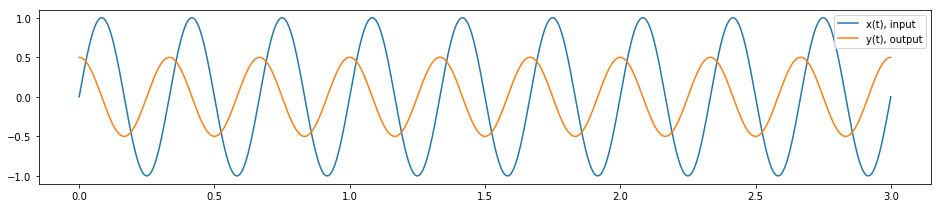

In [14]:

t = np.linspace(0, 3, 5000)
x1000 = np.sin(2*np.pi*3*t)

#output, delayed 0.25[s] and half amplitude
y1000 = 0.5*np.sin(2*np.pi*3*(t-0.25))

width, height = figaspect(0.2)
fig = figure(figsize=(width,height))
plt.plot(t,x1000, label = 'x(t), input')
plt.plot(t,y1000, label = 'y(t), output')
plt.legend()


Great, we have now the response of the system at 3Hz, lets find the average amplitude and move on to the next frequency right?

In [9]:
print(np.average(y1000))

0.0001


Now that number isn't actually zero due to floating point errors, but the average of any symmetircal sinusoid is 0, not very helpful when determining the amplitude. What we instead want is the envelope of the signal, this can be found using the hilbert transform.

<center> $$ \hat{g(t)} = F^{-1}\big\{F\{g(t)\}\cdot 2u(t)\big\} $$

What this does is convert a signal to the frequency domain, multiply the spectrum by the unit step (zeroing out all the negative frequencies) and then converting back to the time domain.


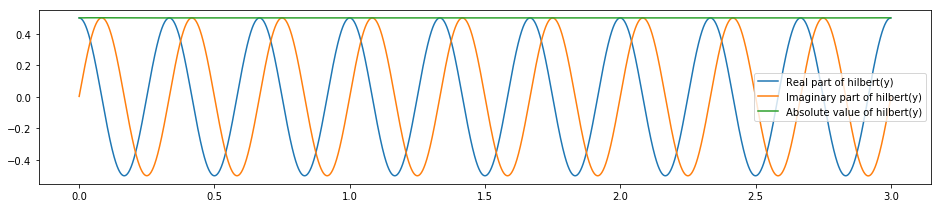

In [10]:
y1000_hilbert = signal.hilbert(y1000)

width, height = figaspect(0.2)
fig = figure(figsize=(width,height))


#plotting code
r = plt.plot(t,y1000_hilbert.real, label="Real part of hilbert(y)")
i = plt.plot(t,y1000_hilbert.imag, label="Imaginary part of hilbert(y)")
mag = plt.plot(t, abs(y1000_hilbert), label ="Absolute value of hilbert(y)")
plt.legend(loc='best')

Now when take the absolute value of the hilbert transform of the signal in question, the envelope can be detected!

 

So now the problem of amplitudes has been solved, what does the phase angle eoncode? It is the frequency of the signal being transmitted, in a way. From the below graph you can clearly see the periodic nature of the signal from the phase. However this on it's own isn't useful, we could already see the signal was periodic from either the real or imaginary part. This changes once we take it's derivative though

<center> $$ f(t) = \angle\hat{g(t)}\frac{d}{dt}\frac{1}{2\pi} $$

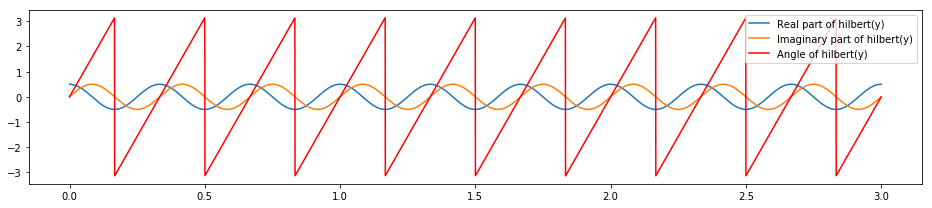

In [11]:
y1000_hilbert = signal.hilbert(y1000)

width, height = figaspect(0.2)
fig = figure(figsize=(width,height))


#plotting code
r = plt.plot(t,y1000_hilbert.real, label="Real part of hilbert(y)")
i = plt.plot(t,y1000_hilbert.imag, label="Imaginary part of hilbert(y)")
ang = plt.plot(t, np.angle(y1000_hilbert),color='r', label ="Angle of hilbert(y)")
plt.legend(loc='best')

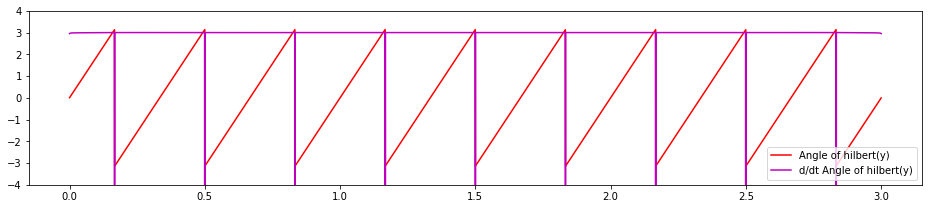

In [12]:
instFreq = np.gradient(np.angle(y1000_hilbert))/(t[1]*2*np.pi)


#plotting code
width, height = figaspect(0.2)
fig = figure(figsize=(width,height))
ang = plt.plot(t, np.angle(y1000_hilbert),color='r', label ="Angle of hilbert(y)")
dang = plt.plot(t, instFreq, color='m', label ="d/dt Angle of hilbert(y)")
plt.ylim([-4,4])
plt.legend(loc='best')

In the above graph it can be seen that the instaneous frequency can be determined from the phase angle, matching up with the 3Hz specified at the beginning.

This property however is far more useful when dealing with signals of varying frequency, lets look a signal starting at 100Hz and ending at 1000Hz

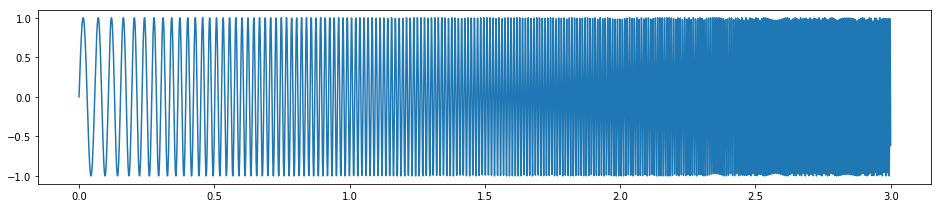

In [117]:
fmSig = np.sin((((1000-100)/t[t.size-1])/2)*t**2 + 100*t)

#plotting code
width, height = figaspect(0.2)
fig = figure(figsize=(width,height))
dang = plt.plot(t, fmSig)

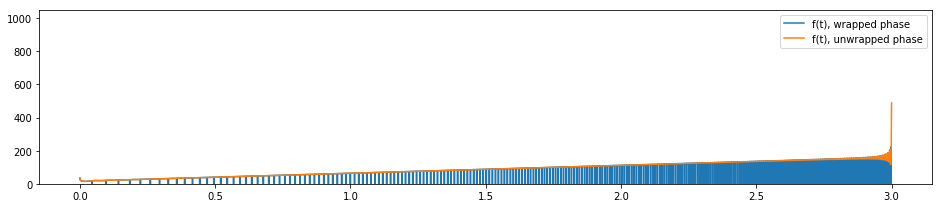

In [118]:
width, height = figaspect(0.2)
fig = figure(figsize=(width,height))

plt.plot(t, np.gradient(np.angle(signal.hilbert(fmSig)))/(t[1]*2*np.pi), label='f(t), wrapped phase')
plt.plot(t, np.gradient(np.unwrap(np.angle(signal.hilbert(fmSig))))/(t[1]*2*np.pi), label='f(t), unwrapped phase')
plt.ylim(0,1050)
plt.legend()

Now, what is the point of all this? It allows you to emulate the fourier transfer at a given frequency in the time domain, and by repeating this multiple times across a range of frequencies, a spectrum can be created.